In [194]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [195]:
data = pd.read_csv("model_data.csv")
data.head()

,Unnamed: 0,Property_Code,Tenant_Code,Event,DateOccurred,Unit_Code,DateMoveIn,DateMoveOut,Rent,Vacancy,SQFT,BedRooms,Bathroom,chrent,LengthStay,Apt Size
0,1,ce,t0013745,Rent Change,5/31/2014,C05266,11/9/2006,1/31/2015,896.0,1,1400,3,2.5,26.0,245 days 00:00:00.000000000,large
1,4,ce,t0013748,Rent Change,9/30/2013,C05272,9/28/2012,NaN,800.0,0,1088,2,1.5,30.0,NaN,large
2,5,ce,t0013748,Rent Change,11/1/2014,C05272,9/28/2012,10/31/2015,824.0,1,1088,2,1.5,24.0,364 days 00:00:00.000000000,large
3,9,ce,t0013749,Rent Change,12/31/2013,C05274,11/26/2008,NaN,915.0,0,1400,3,2.5,35.0,NaN,large
4,10,ce,t0013749,Rent Change,3/1/2015,C05274,11/26/2008,NaN,924.0,0,1400,3,2.5,9.0,NaN,large


In [196]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [197]:
data.drop(data[(data.Vacancy==0)].index, inplace=True)


In [198]:
max(data["SQFT"])

1400

In [199]:
data["LengthStay"] = data["LengthStay"].str.split(" ", n = 0, expand = True) 

In [200]:
data["LengthStay"] = data["LengthStay"].astype(int)

In [201]:
data.drop(["DateMoveOut","DateMoveIn","Tenant_Code","Unit_Code","Event","DateOccurred"], axis=1, inplace= True)
data.fillna(0, inplace = True)

In [202]:
data2 = pd.get_dummies(data)

In [203]:
data2.to_csv("linearhotencode.csv")

In [204]:
X = data2[['Rent', 'Vacancy', 'SQFT', 'BedRooms', 'Bathroom', 'chrent', 'Property_Code_ce', 'Property_Code_fh','Property_Code_mpg', 'Property_Code_sh']]
y = data2['LengthStay'].values.reshape(-1, 1)

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [206]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [207]:
### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Lena\Anaconda3\envs\threesix\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [213]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
#model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [214]:
predictions = model.predict(X_test_scaled)
#predictions = model.predict(X_test)

In [215]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

#MSE = mean_squared_error(y_test, predictions)
#r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.096720135994159, R2: 0.050434087204406446


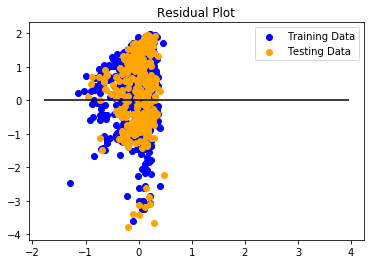

In [217]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()